In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv'
df = pd.read_csv(url)
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


2.3.1

In [9]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [11]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


2.3.2

In [15]:
df.isna().sum()

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [4]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [21]:
df.dtypes

user_id        int64
age          float64
country       object
purchases      int64
revenue        int64
dtype: object

In [3]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [32]:
num_cols = df[['user_id', 'age', 'purchases', 'revenue']]
negative_counts = (num_cols < 0).sum()
print(negative_counts)

user_id      0
age          0
purchases    1
revenue      0
dtype: int64


In [42]:
df[df['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [41]:
df[df['age'] > 100]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [40]:
df[(df['purchases'] != 0) & (df['revenue'] == 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [43]:
df.nunique()

user_id      40
age          28
country       5
purchases    12
revenue      37
dtype: int64

Были найдены 2 пропуска в возрасте, дубликат уникального id пользователя, нулевой доход при ненулевых тратах (про id и доход в одной строке. В этой же строке нереалистичный возраст пользователя - 120 лет). Найдено отрицательное число в покупках, чего быть не может(там тоже еще нереалистичный возраст указан).

EDA

In [6]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [27]:
cat_age = pd.cut(df['age'], 3, labels=['young', 'adult', 'old'], include_lowest=True)
cat_age.value_counts()
#здесь не очень разбивать на категории по возрасту, поскольку у нас есть неадекватный возраст - 120 лет. В данном ноутбуке мы не обработали эту проблему, поэтому разбить на категории тут будет неуместно на данном этапе

age
young    28
adult    10
old       1
Name: count, dtype: int64

In [23]:
df.groupby('country')['revenue'].mean()

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

In [24]:
df.groupby('country')['age'].median()

country
CN    24.0
DE    35.0
FR    42.0
RU    26.0
US    39.0
Name: age, dtype: float64

In [25]:
df.groupby('purchases')['revenue'].mean()

purchases
-1      785.000
 0        0.000
 1      142.000
 2      434.000
 3      504.600
 4      747.000
 5      635.000
 6     1078.500
 7      970.375
 8     1488.000
 9     1494.000
 11    2475.000
Name: revenue, dtype: float64

In [31]:
category_for_revenue = pd.cut(df['revenue'],3, labels=['low', 'middle', 'high'], include_lowest=True)
category_for_revenue.value_counts()

revenue
low       25
middle    12
high       4
Name: count, dtype: int64

Больше всего данных о представителях из России и Франции, меньше всего из Китая. Средняя выручка больше всего в Германии. Медианный возраст схож у России и Китая(24 и 26), но сильно различен с США, Францией и Германией(39, 42, 35).

В данном наборе данных преимщественно представлены представители с небольшой выручкой. 

Из неожиданного только то, что при попытке распределить доход по категориям, оказалось, что большинство имеют маленький доход, а не средний. При попытке добаавить больше категорий, чтобы нормализовать распределение доходов, результат оказался тем же. Скорее всего это из-за сильных выбросов + была найдена ошибка в данных (строка с нулевым доходом при ненулевой закупке)

Графики

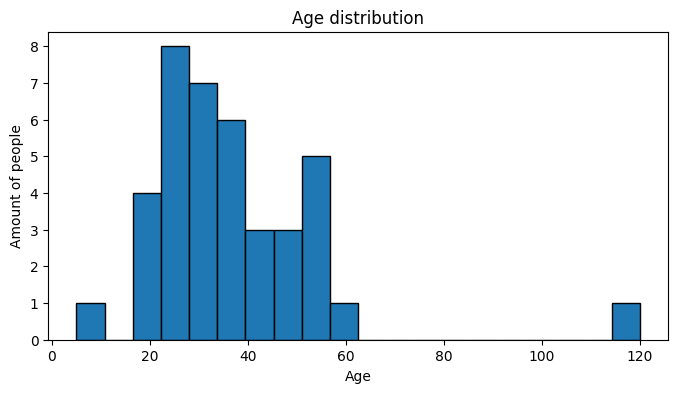

In [27]:
#строим гистограмму для просмотра распределенпия возраста. Параметр edgecolor для границ столбиков
fig, ax = plt.subplots(figsize = (8, 4))
ax.hist(df['age'], bins = 20, edgecolor = 'black')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Amount of people')
plt.savefig('figures/age_distribution')
plt.show()

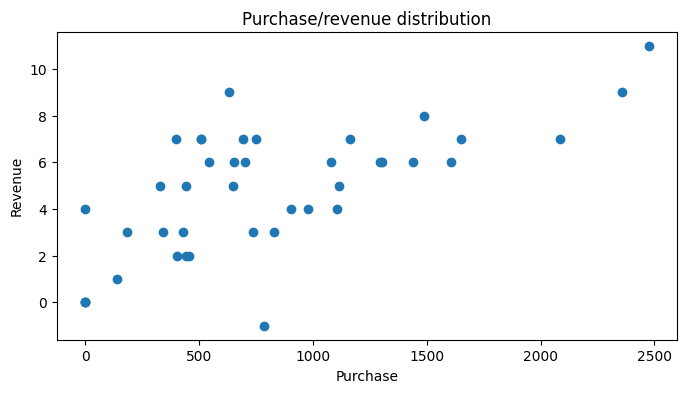

In [26]:
#строим scatterplot для того, чтобы посмотреть распределение прибыли по затратам
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(x=df['revenue'], y=df['purchases'])
plt.title('Purchase/revenue distribution')
plt.xlabel('Purchase')
plt.ylabel('Revenue')
plt.savefig('figures/purch_rev_distrib')
plt.show()

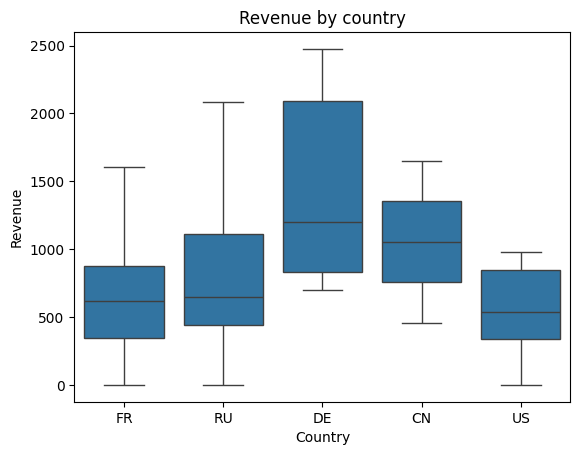

In [25]:
#строим боксплоты распределения выручки по странам
sns.boxplot(data=df, x='country', y='revenue')
plt.title('Revenue by country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.savefig('figures/boxplot_rev_country')
plt.show()